# Last Cycle
Now that the cycle stabilized we can cycle one more time to track relevant quantities:
- Mutual Information
- Work
- Heat
- Internal Energy (?)

In [1]:
using Revise
using Dates

In [15]:
dir = "cascade_25D_I1";

includet("./modules/OpticalCavity.jl")
includet("./modules/Thermodynamics.jl")
includet("./modules/Phaseonium.jl")
includet("./modules/BosonicOperators.jl")
includet("./modules/Measurements.jl")

includet("./src/main.jl")
config, ndims = init(dir)

total_cycles = config["loading"]["past_cycles"]
system_evolution = []

const THERMALIZED = false;
const PLOT_EVO = true;

# Load or create state
state = load_or_create(dir, config)
# Reset state
if !THERMALIZED
    # Reinitialize memory
    state.ρ₁_evolution = [] 
    state.ρ₂_evolution = []
    state.c₁_evolution = []
    state.c₂_evolution = [];
end
# Report file
open(dir * "/report.txt", "w") do io
    println(io, "Starting simulation at time $(now()) with config:\n$config")
end

check_cutoff(state.ρ, ndims)

Simulation 5 - 25D - Fast thermalization - High entanglement: what happens to the efficiency?

Initial Temperature of the Cavity: 2.27
Apparent Temperature carried by Hot Phaseonium atoms: 20.0
Apparent Temperature carried by Cold Phaseonium atoms: 0.005
Loading file cascade_25D_I1/state_20C.jl
Average Photons: 0.3143575244251847
Last Element 2.0113775035738794e-18


Cycle 1


Isochoric Stroke


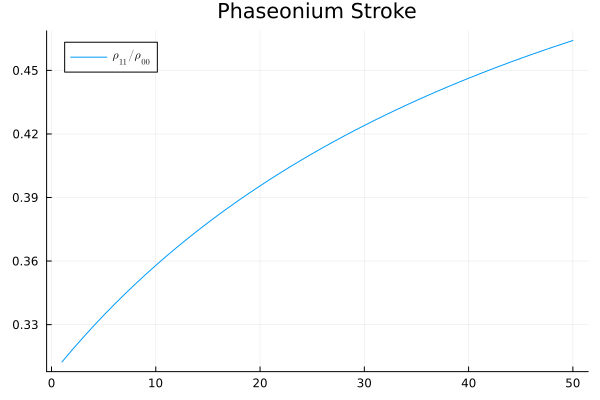

Average Photons: 0.806005043313609 + 8.131688536830895e-16im
Adiabatic Expansion


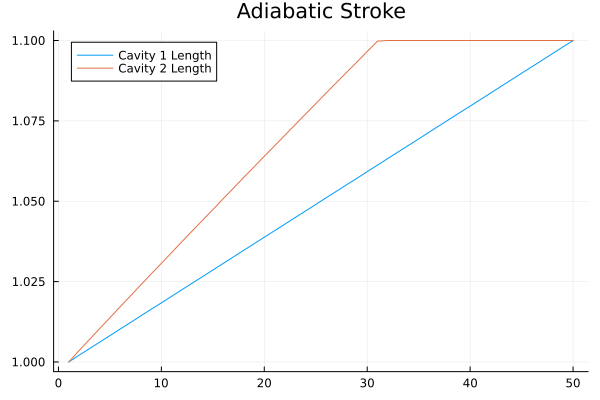

Isochoric Stroke


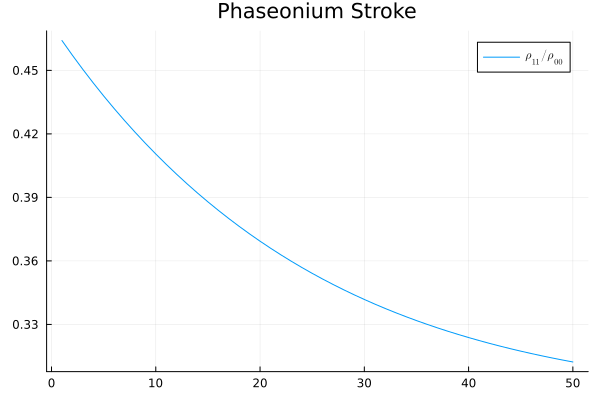

Average Photons: 0.29166911310576443 + 4.1359494549342296e-16im
Adiabatic Contraction


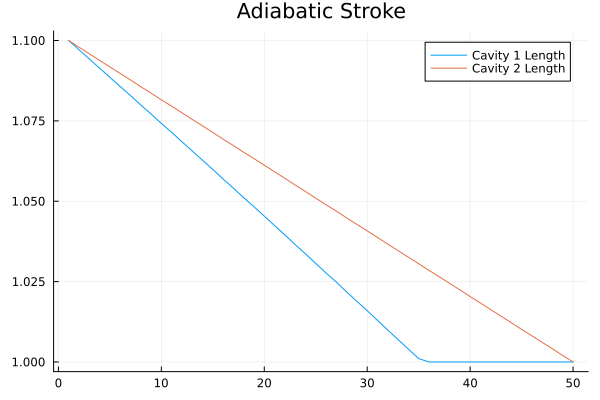

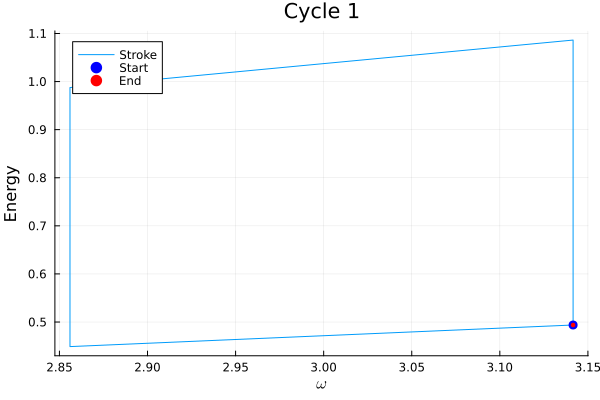

Cycle 2
Isochoric Stroke


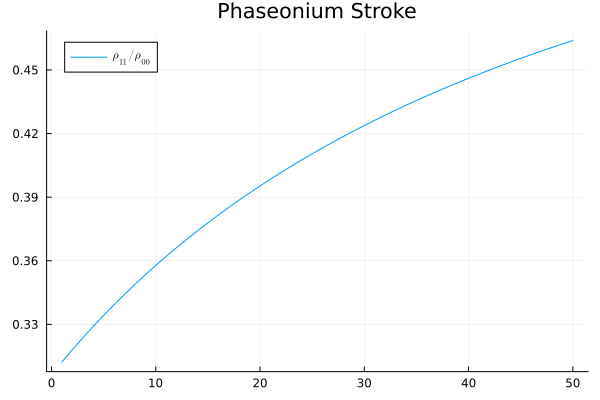

Average Photons: 0.8054591278796235 + 9.967062941496952e-16im
Adiabatic Expansion


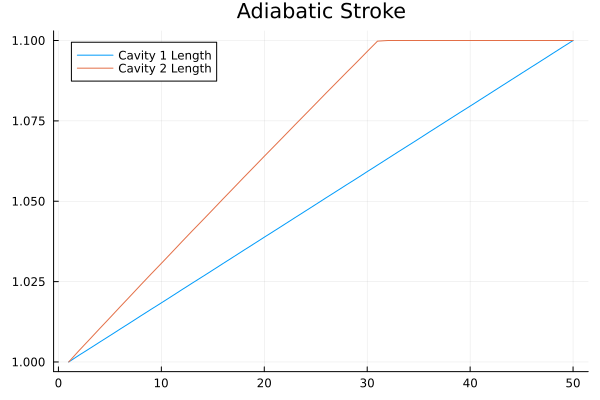

Isochoric Stroke


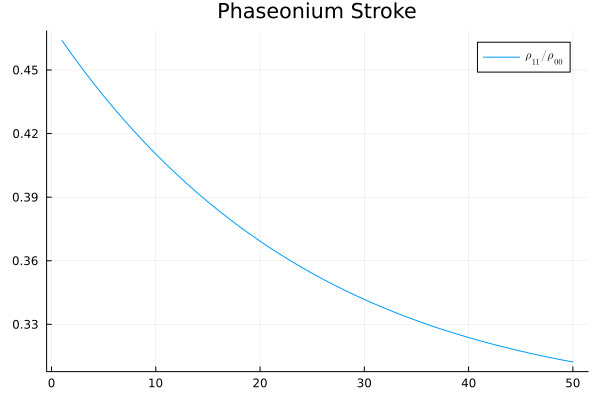

Average Photons: 0.29156522918598193 + 4.2336531930263377e-16im
Adiabatic Contraction


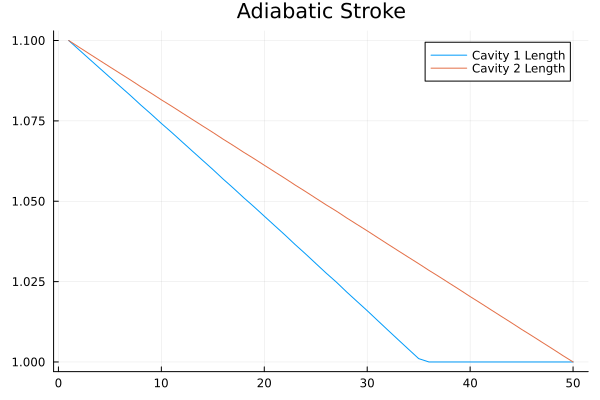

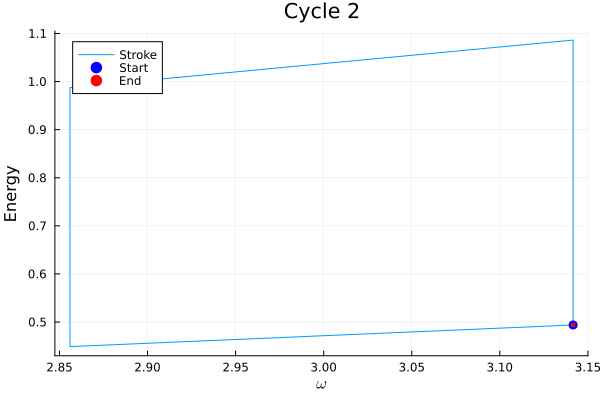

Cycle 3
Isochoric Stroke


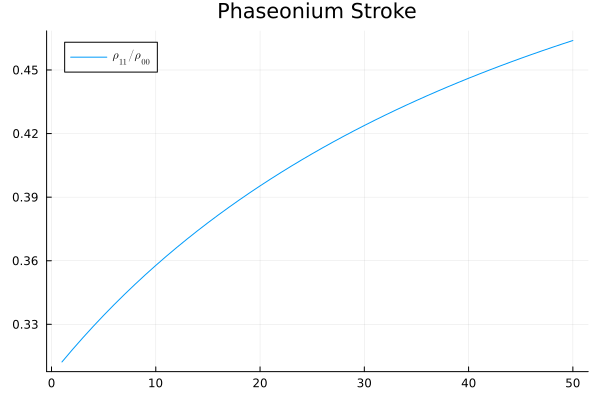

Average Photons: 0.8054365527246582 + 1.2391135923608253e-15im
Adiabatic Expansion


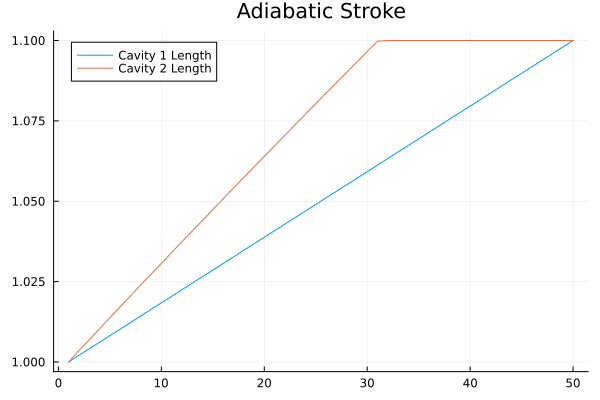

Isochoric Stroke


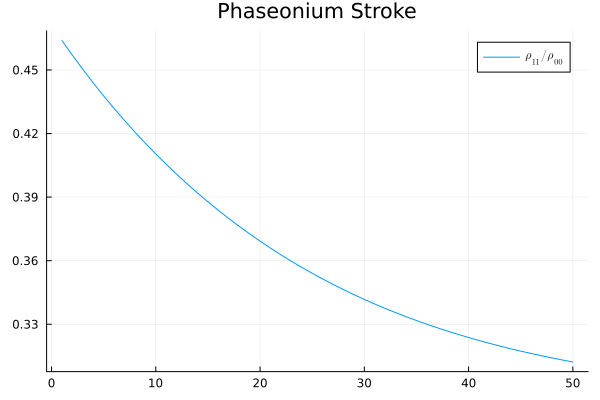

Average Photons: 0.2915411211202529 + 4.1188516788312367e-16im
Adiabatic Contraction


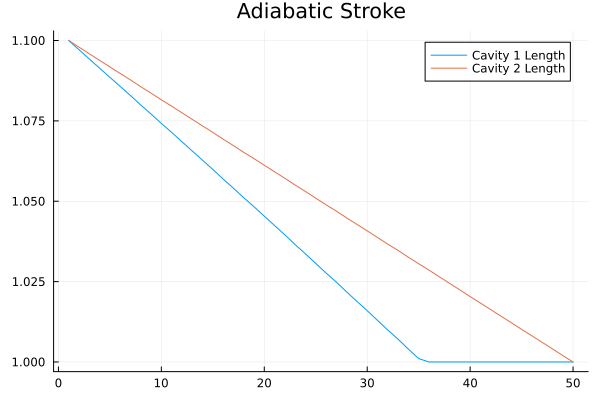

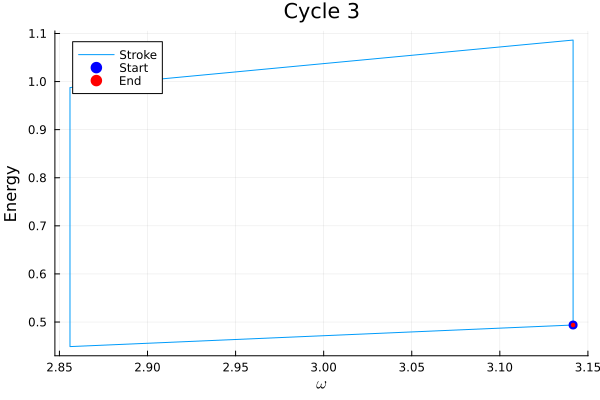

Cycle 4
Isochoric Stroke


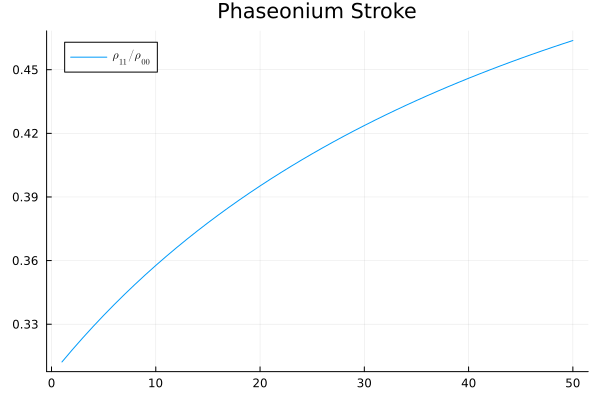

Average Photons: 0.8050506833967713 + 9.890115378010325e-16im
Adiabatic Expansion


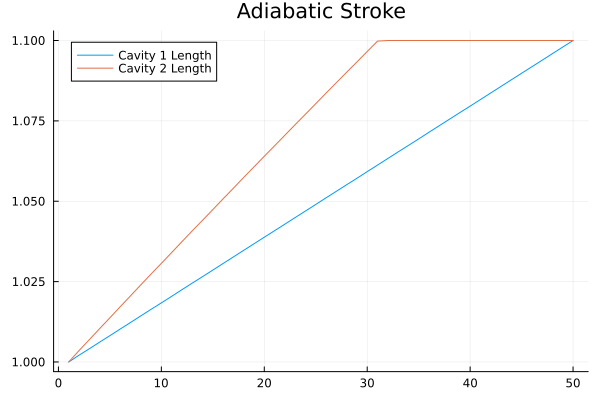

Isochoric Stroke


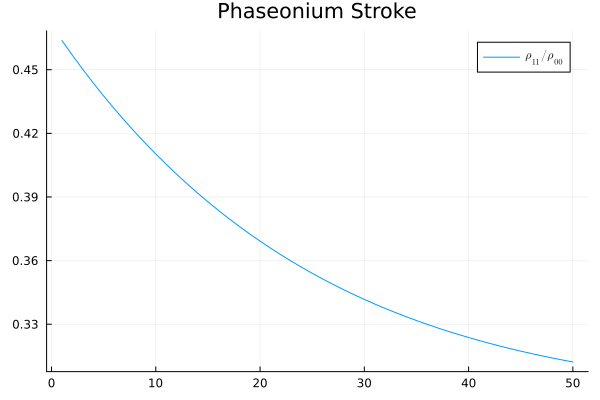

Average Photons: 0.2914756632719299 + 1.000065737644181e-16im
Adiabatic Contraction


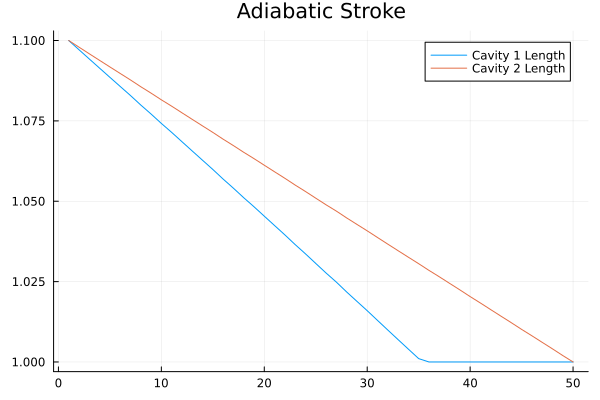

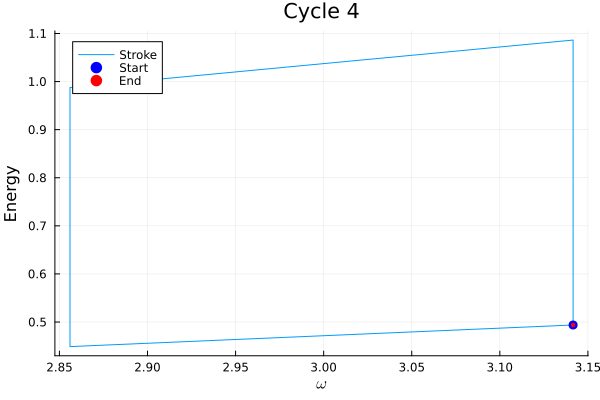

Cycle 5
Isochoric Stroke


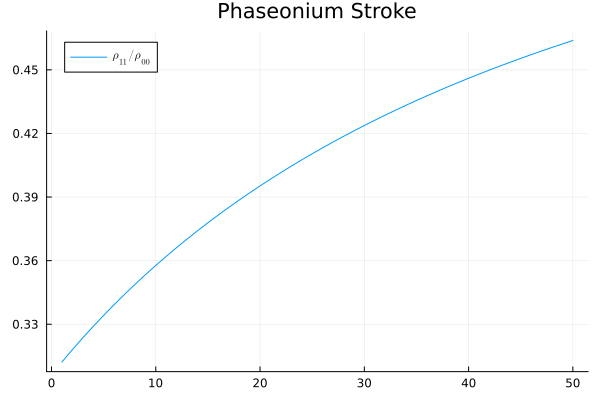

Average Photons: 0.8052083643414841 + 6.408650517418818e-16im
Adiabatic Expansion


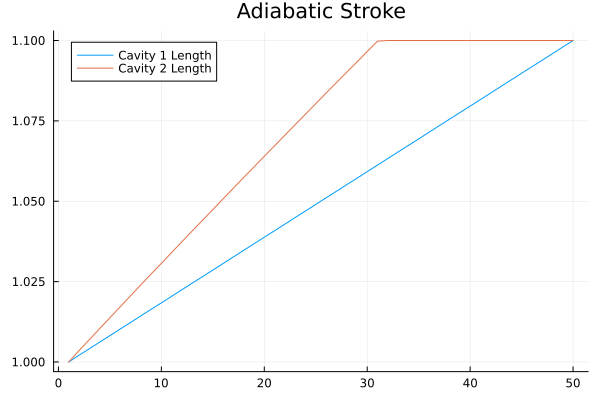

Isochoric Stroke


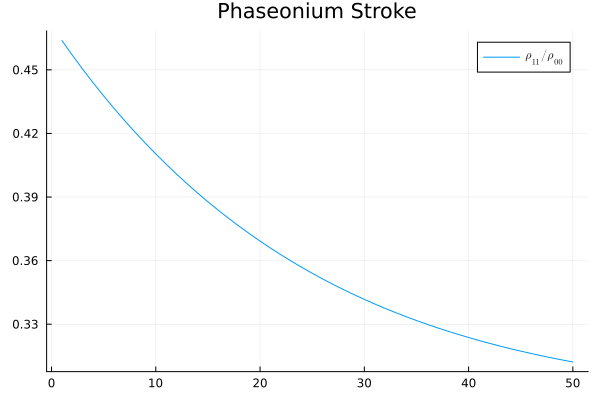

Average Photons: 0.2914877968368267 + 3.1376843202920086e-16im
Adiabatic Contraction


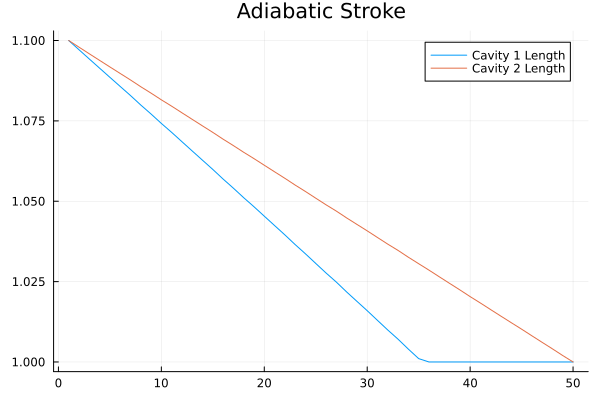

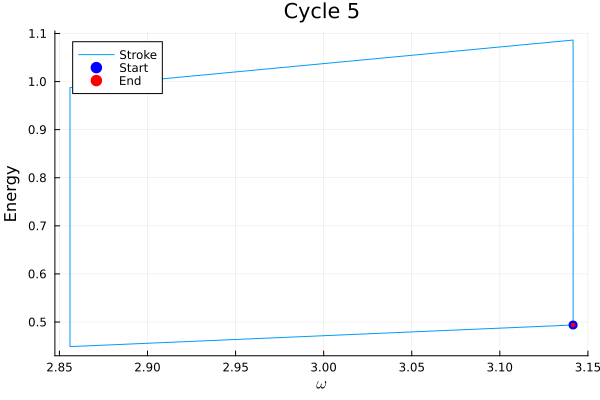

Cycle 6
Isochoric Stroke


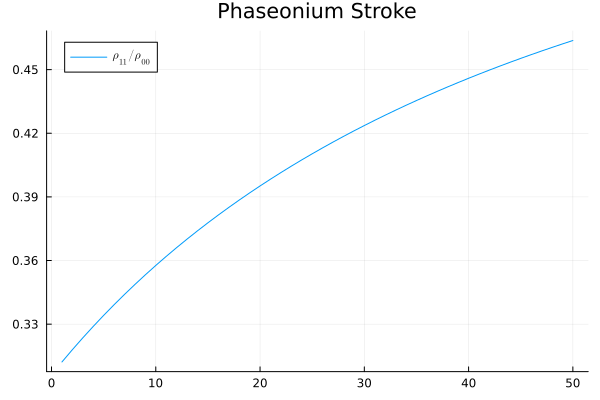

Average Photons: 0.8048683569483944 + 9.580564524671087e-16im
Adiabatic Expansion


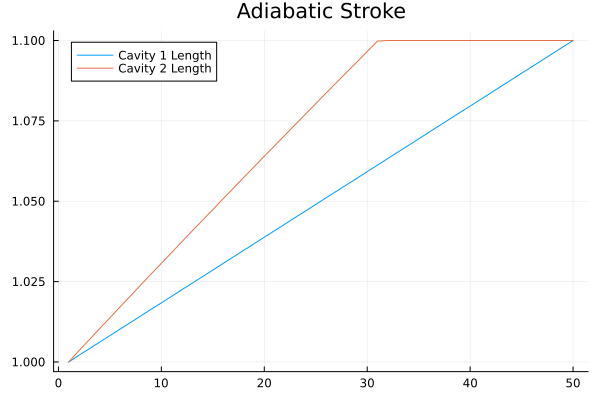

Isochoric Stroke


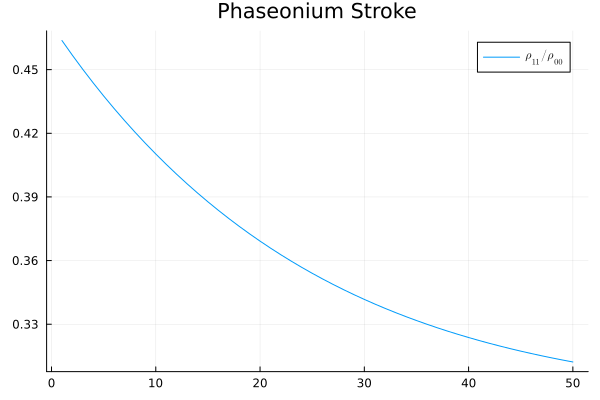

Average Photons: 0.2914371527340457 + 3.922094450106196e-16im
Adiabatic Contraction


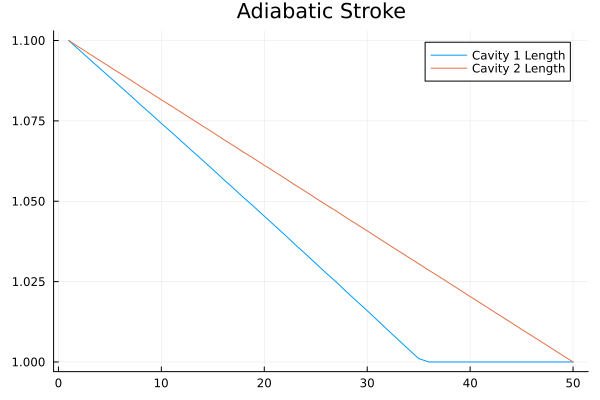

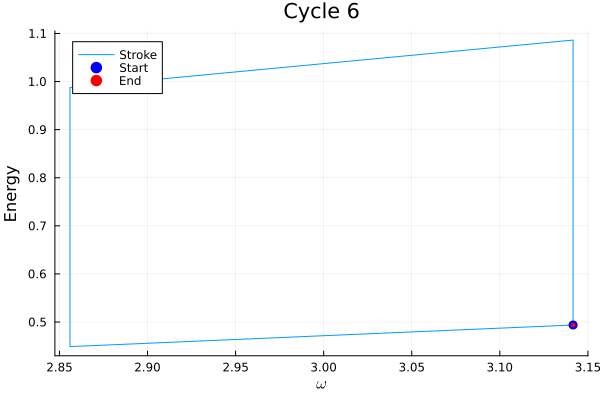

Cycle 7
Isochoric Stroke


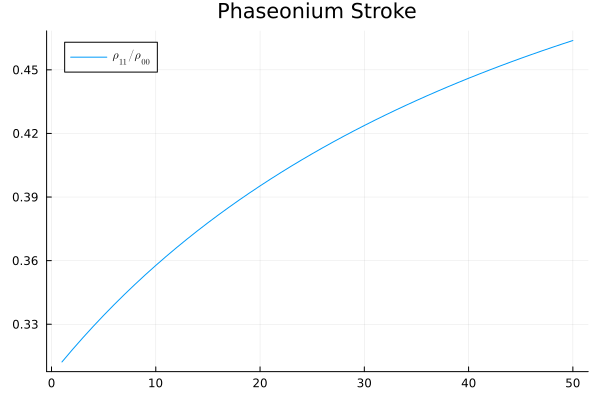

Average Photons: 0.8051503298264233 + 1.1663596071136821e-15im
Adiabatic Expansion


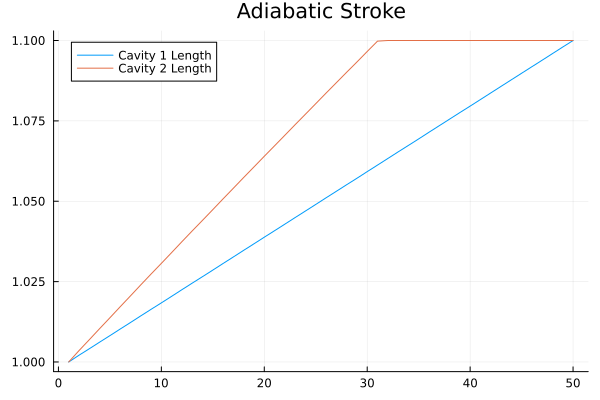

Isochoric Stroke


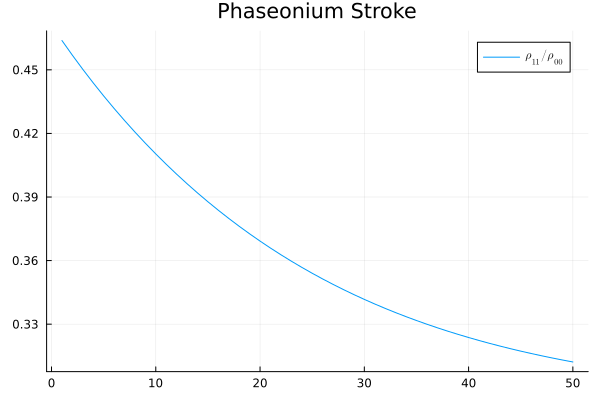

Average Photons: 0.291471333432178 + 2.877576302716194e-16im
Adiabatic Contraction


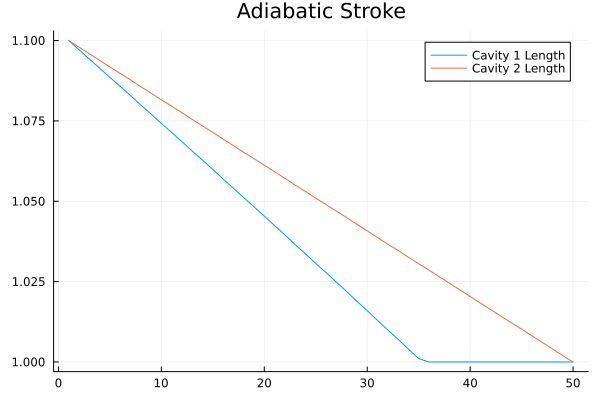

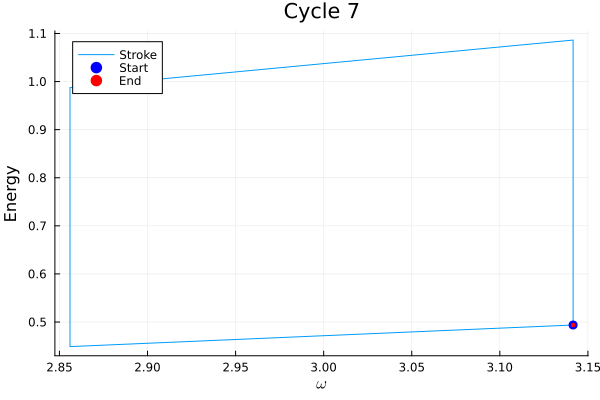

Cycle 8
Isochoric Stroke


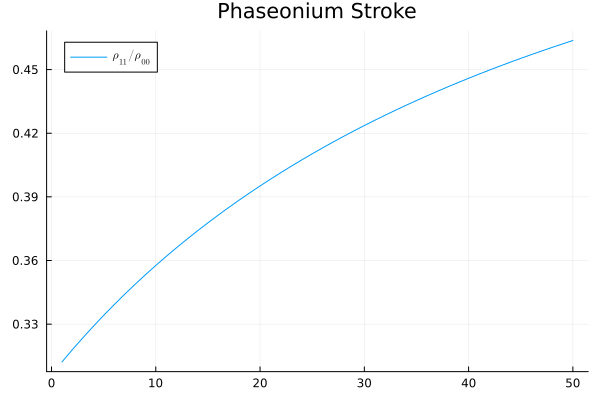

Average Photons: 0.8047733989903634 + 8.724819994856414e-16im
Adiabatic Expansion


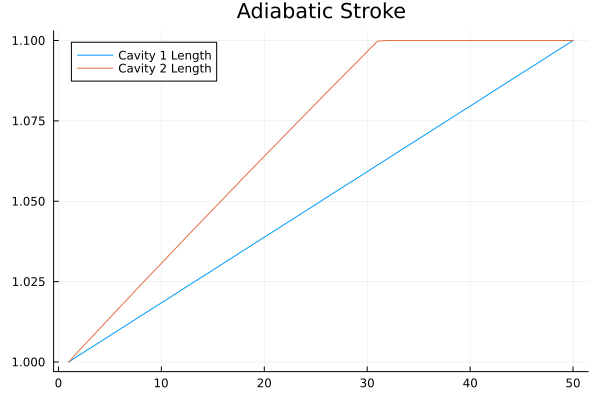

Isochoric Stroke


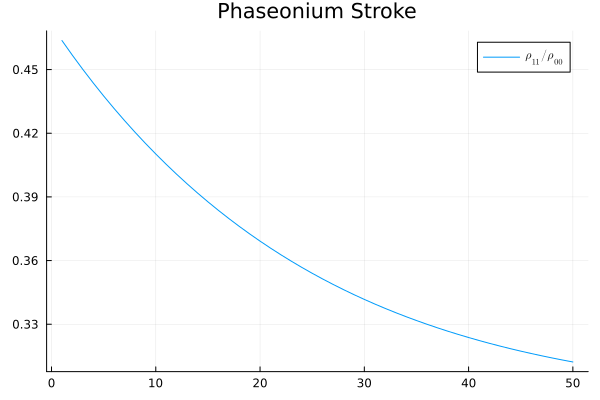

Average Photons: 0.2914192386101545 + 4.1874965199253063e-16im
Adiabatic Contraction


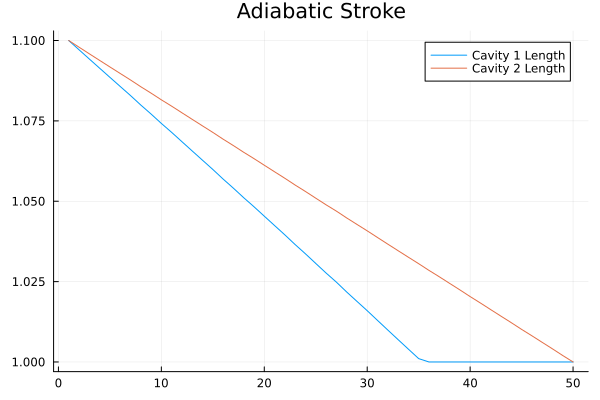

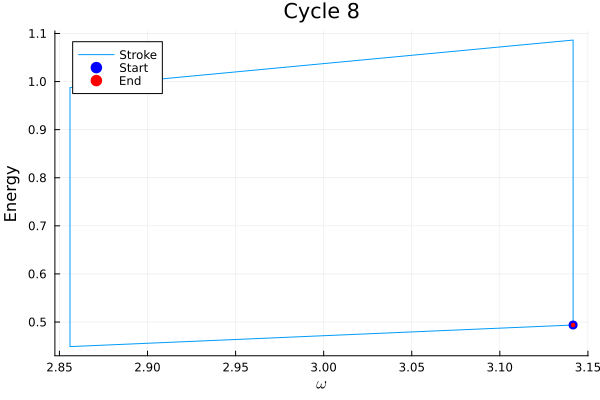

Cycle 9
Isochoric Stroke


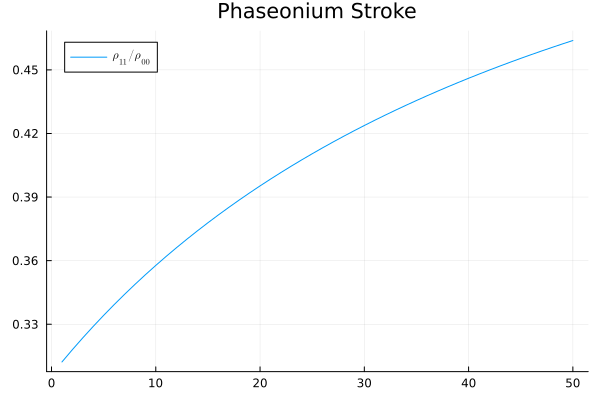

Average Photons: 0.8051660107236005 + 1.1828199514125274e-15im
Adiabatic Expansion


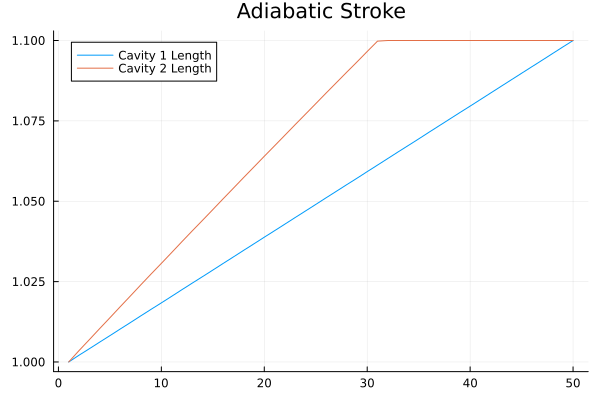

Isochoric Stroke


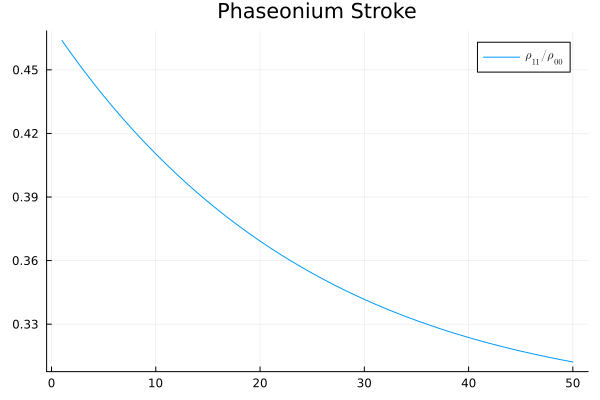

Average Photons: 0.2914700344804992 + 3.9425104050864534e-16im
Adiabatic Contraction


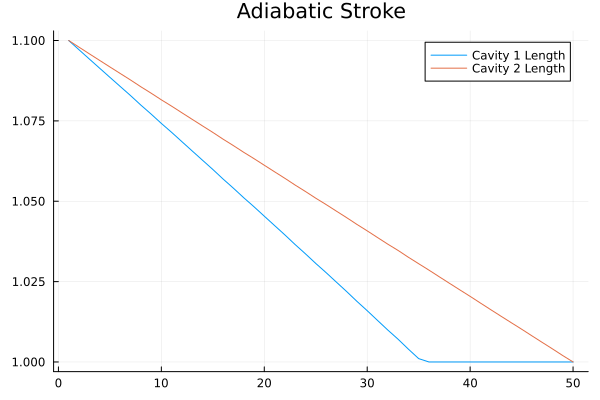

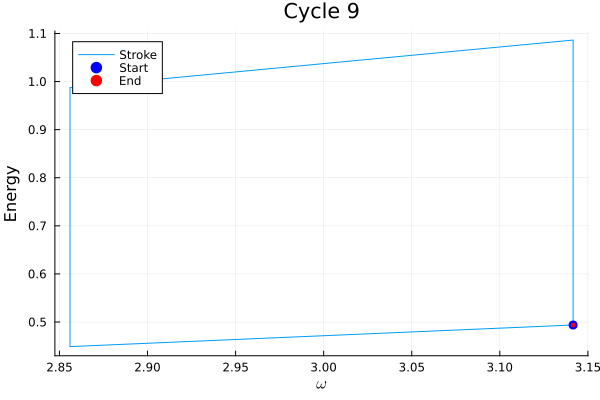

Cycle 10
Isochoric Stroke


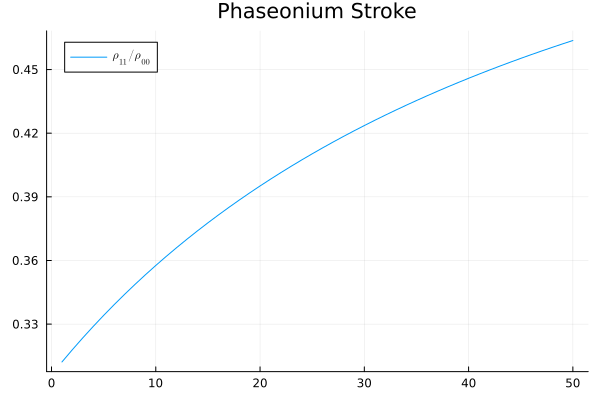

Average Photons: 0.8046977796239819 + 1.0001328670524134e-15im
Adiabatic Expansion


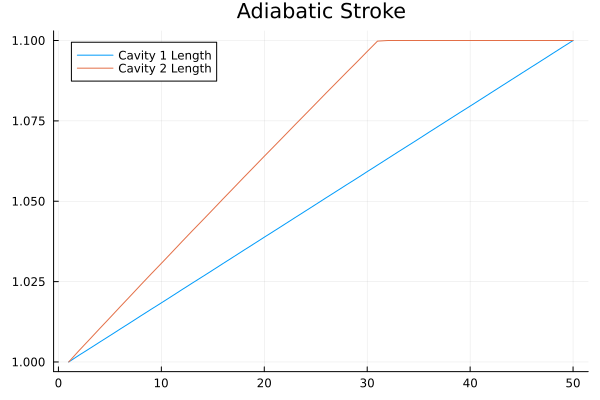

Isochoric Stroke


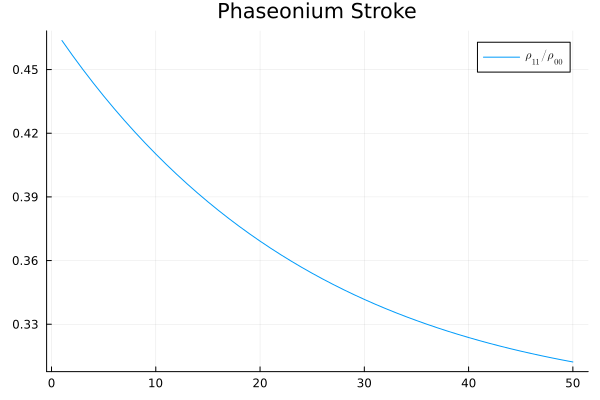

Average Photons: 0.2914071185760034 + 3.2895124498197475e-16im
Adiabatic Contraction


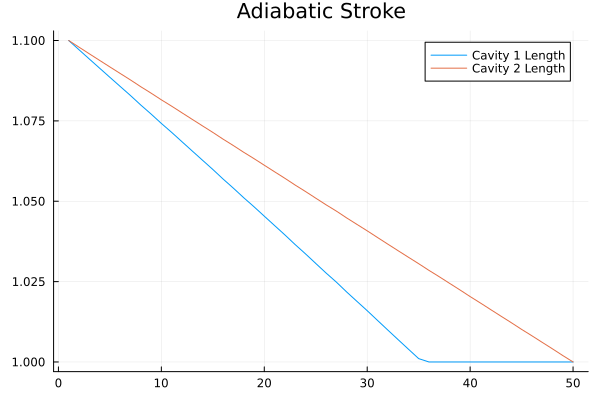

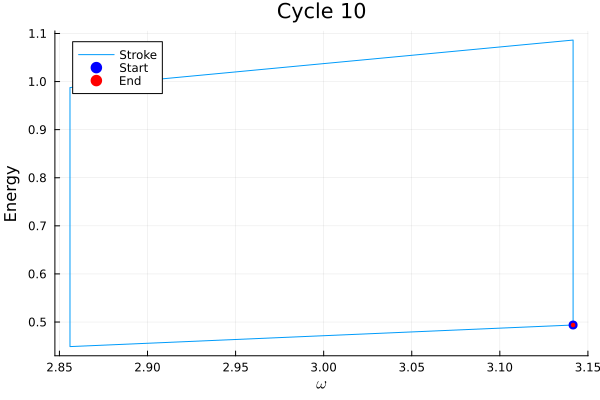

Cycle len: 66.66666666666667 steps


In [ ]:
# Cycle

isochore_time = config["stroke_time"]["isochore"]
isochore_samplings = config["samplings"]["isochore"]
adiabatic_time = config["stroke_time"]["adiabatic"]
adiabatic_samplings = config["samplings"]["adiabatic"]

total_cycle_time = isochore_samplings * 2 + 2 * adiabatic_samplings
cycle_steps = []  # This keeps track of the total time of each stroke

if !THERMALIZED
    try
        for t in 1:config["cycles"]
            println("Cycle $t")
            state, system_evolution = cycle(
                state, Δt, system_evolution, cycle_steps, 
                isochore_time, isochore_samplings, adiabatic_time, adiabatic_samplings);
            total_cycles += 1

            if PLOT_EVO
                sys = state.ρ₁_evolution
                cav = state.c₁_evolution
                g = measure_and_plot("Frequency", "Energy", sys, cav, "Cycle $t"; α=π)
                display(g)
            end
        end
    catch e 
        println(e)
        open(dir * "/report.txt", "a") do io
            println(io, "Error '$e' at time $(now()) after $(length(system_evolution)) steps")
        end
        error("Error $e: ending cycle")
    else
        serialize(dir * "/state_$(total_cycles)C.jl", state)
        serialize(dir * "/state_evolution_$(total_cycles)C.jl", system_evolution)
        serialize(dir * "/cavity1_evolution_$(total_cycles)C.jl", state.c₁_evolution)
        serialize(dir * "/cavity2_evolution_$(total_cycles)C.jl", state.c₂_evolution)
    end
else
    system_evolution = deserialize(dir * "/state_evolution_$(total_cycles)C.jl");
end
println("Cycle len: $(size(system_evolution)[1] / total_cycles) steps")

### Check stability of the Cycle

(2000,)
(2000,)


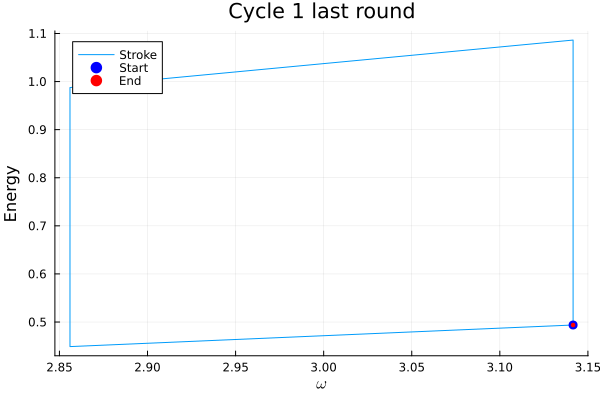

In [26]:
println(size(system_evolution))
println(size(state.c₁_evolution))
state_evolution = state.ρ₁_evolution[end-total_cycle_time+1:end] # last cycle
cavity_evolution = state.c₁_evolution[end-total_cycle_time+1:end] # last cycle
g = measure_and_plot("Frequency", "Energy", state_evolution, cavity_evolution, "Cycle 1 last round"; α=π)

In [ ]:
savefig(g, dir * "/last_cycle.png")

"/home/pmxfa13/phaseonium/thermophaseonium/julia/cascade_25D_I1/last_cycle.png"

## Save Last Cycle

In [24]:
α0 = config["cavity"]["alpha"]

last_evolution = system_evolution[end-total_cycle_time+1:end]
ω₁_evolution = [α0 / l1 for l1 in state.c₁_evolution[end-total_cycle_time+1:end]]
ω₂_evolution = [α0 / l2 for l2 in state.c₂_evolution[end-total_cycle_time+1:end]]

dict_evolution = Dict(string(i)=>last_evolution[i] for i in 1:length(last_evolution))
cycle_steps = Vector{Float64}(cycle_steps)

npzwrite(dir * "/cycle_steps.npy", cycle_steps[end-3:end])
npzwrite(dir * "/cavities_evolution_1cycle.npz", c1=ω₁_evolution, c2=ω₂_evolution)
npzwrite(dir * "/cascade_evolution_1cycle.npz", dict_evolution)